# Решение антагонистической игры

In [4]:
from scipy.optimize import linprog as lp
import numpy as np
import matplotlib.pylab as plt

def nash_equilibrium(a):
    size = a.shape
    rows = size[0]
    cols = size[1]
    a1 = a.transpose()
    b1 = np.ones((1,cols), dtype=np.int)
    c1 = np.ones((1,rows), dtype=np.int)

    a2 = a
    b2 = np.ones((1,rows), dtype=np.int)
    c2 = np.ones((1,cols), dtype=np.int)

    v = 1/ (lp(c1[0],-a1,-b1[0]).fun)
    p = lp(c1[0],-a1,-b1[0]).x * v

    v = -1/ (lp(-c2[0],a2,b2[0]).fun)
    q = lp(-c2[0],a2,b2[0]).x * v

    return v,p,q

# Графики

In [25]:
def draw(p, q):
    def show(p):
        x = len(p)
        y = max(p)
        plt.xlim([0, x + x / 4])
        plt.ylim([0, y + y / 4])
        for i, value in enumerate(p):
            plt.scatter(1.0 * i + 1, value, color = 'blue')
            plt.plot([1.0 * i + 1, 1.0 * i + 1], [0.0, value], color = 'blue') 
            plt.grid(True)
        plt.show()
    show(p)
    show(q)

In [26]:
def run(matrix):
    v, p, q = nash_equilibrium(matrix)
    draw(p, q)

# Неполный спектр

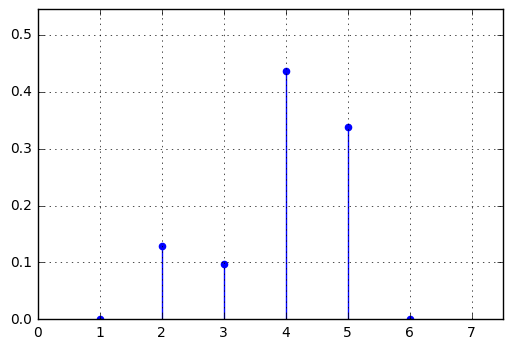

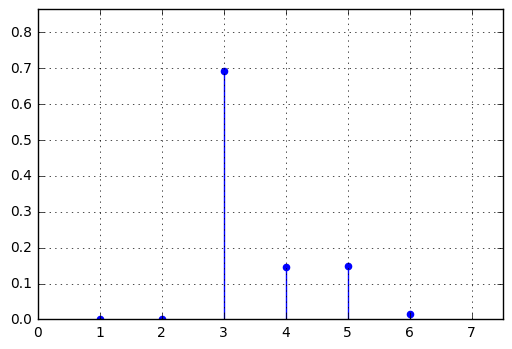

In [27]:
matrix = np.array([[4,0,6,2,2,1],
                   [3,8,4,10,4,4],
                   [1,2,6,5,0,0],
                   [6,6,4,4,10,3],
                   [10,4,6,4,0,9],
                   [10,7,0,7,9,8]])
run(matrix)

# Полный спектр

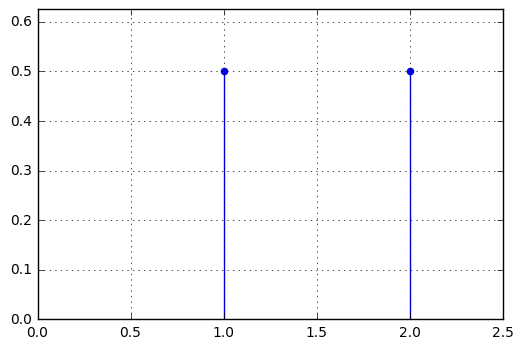

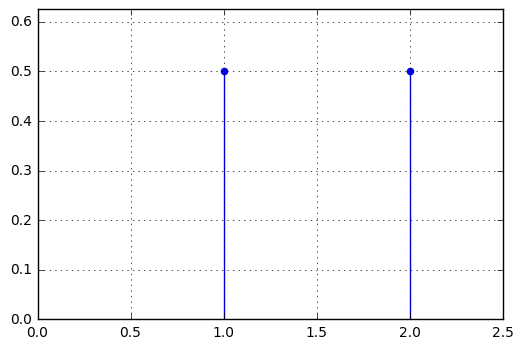

In [28]:
matrix = np.array([[3,1],
                  [1,3]])
run(matrix)

# 1 точка равновесия по Нэшу

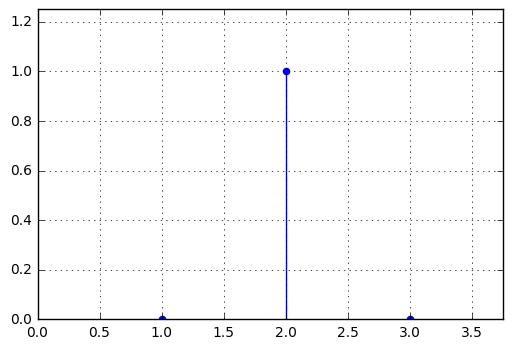

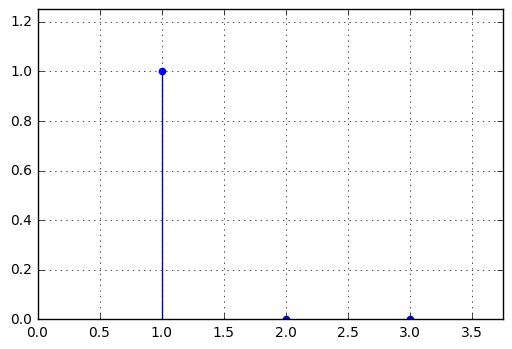

In [29]:
matrix = np.array([[0,1,1],
                   [1,1,1],
                   [1,1,1]])
run(matrix)